In [41]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# Training MNIST neural network model

In [0]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

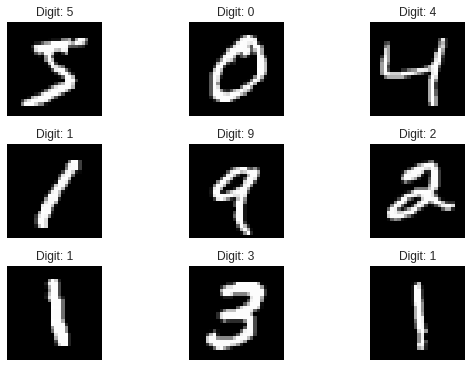

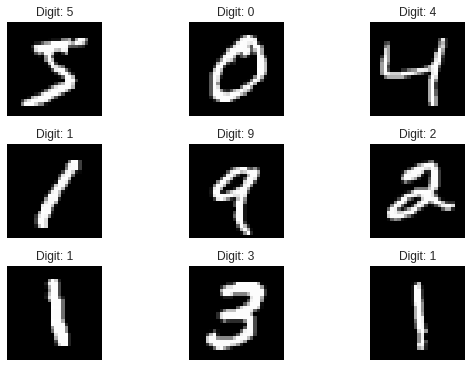

In [43]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [44]:
import keras

# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, 10)
#y_test = keras.utils.to_categorical(y_test, 10)
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [45]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               605824    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 48s 808us/step - loss: 0.2024 - acc: 0.9389
Epoch 2/10
60000/60000 [==============================] - 48s 797us/step - loss: 0.0841 - acc: 0.9747
Epoch 3/10
60000/60000 [==============================] - 48s 792us/step - loss: 0.0576 - acc: 0.9823
Epoch 4/10
60000/60000 [==============================] - 48s 793us/step - loss: 0.0428 - acc: 0.9861
Epoch 5/10
60000/60000 [==============================] - 47s 786us/step - loss: 0.0348 - acc: 0.9885
Epoch 6/10
60000/60000 [==============================] - 47s 783us/step - loss: 0.0285 - acc: 0.9904
Epoch 7/10
60000/60000 [==============================] - 48s 793us/step - loss: 0.0244 - acc: 0.9912
Epoch 8/10
60000/60000 [==============================] - 48s 798us/step - loss: 0.0205 - acc: 0.9930
Epoch 9/10
60000/60000 [==============================] - 47s 781us/step - loss: 0.0200 - acc: 0.9928
Epoch 10/10
60000/60000 [==============================] - 47s 785us/step - loss: 

In [47]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 272us/step


[0.061029785854876534, 0.9851]

In [0]:
model.save('/content/gdrive/My Drive/Colab Notebooks/Saved Models/mnist_model.h5')

# Training Malayalam neural network model

### Loading Dataset

In [0]:
import os

def get_file_list_from_dir(datadir):
    all_files = os.listdir(os.path.abspath(datadir))
    return all_files

from random import shuffle

def randomize_files(file_list):
    shuffle(file_list)
    
from math import floor

def get_training_and_testing_sets(file_list):
    split = 0.6
    split_index = floor(len(file_list) * split)
    training = file_list[:split_index]
    testing = file_list[split_index:]
    return training, testing

def get_immediate_subdirectories(a_dir):
    return [name for name in os.listdir(a_dir)
            if os.path.isdir(os.path.join(a_dir, name))]

from shutil import copyfile

rootdir = '/content/gdrive/My Drive/Colab Notebooks/Omniglot/Malayalam/character/'
sub_dir_list = get_immediate_subdirectories(rootdir)
print(sub_dir_list)

for dir in sub_dir_list:
    subdir = rootdir+dir+'/'
    print(subdir)
    image_list = get_file_list_from_dir(subdir)
    print(image_list)
    randomize_files(image_list)
    print(image_list)
    train, test = get_training_and_testing_sets(image_list)
    for tn in train:
        dest_train = '/content/gdrive/My Drive/Colab Notebooks/Omniglot/Malayalam/train/'+dir
        if not os.path.exists(dest_train):
            os.makedirs(dest_train)
        copyfile(subdir+tn, dest_train+'/'+tn)
        
    for ts in test:
        dest_test = '/content/gdrive/My Drive/Colab Notebooks/Omniglot/Malayalam/test/'+dir
        if not os.path.exists(dest_test):
            os.makedirs(dest_test)
        copyfile(subdir+ts, dest_test+'/'+ts)

In [84]:
from keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(rescale=1./255) #included in our dependencies

all_generator=datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/Omniglot/Malayalam/character',
                                                 target_size=(28,28),
                                                 color_mode='grayscale',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

train_generator=datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/Omniglot/Malayalam/train',
                                                 target_size=(28,28),
                                                 color_mode='grayscale',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

test_generator=datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/Omniglot/Malayalam/test',
                                                 target_size=(28,28),
                                                 color_mode='grayscale',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 940 images belonging to 47 classes.
Found 564 images belonging to 47 classes.
Found 376 images belonging to 47 classes.


### True Model

In [81]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
true_model = Sequential()
true_model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
true_model.add(MaxPooling2D(pool_size=(2, 2)))
true_model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
true_model.add(Dense(2048,activation='relu')) #we add dense layers so that the model can learn more complex functions and classify for better results.
true_model.add(Dense(1024,activation='relu')) #dense layer 2
true_model.add(Dense(512,activation='relu')) #dense layer 3
true_model.add(Dense(47,activation=tf.nn.softmax))
true_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 4732)              0         
_________________________________________________________________
dense_59 (Dense)             (None, 2048)              9693184   
_________________________________________________________________
dense_60 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_61 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_62 (Dense)             (None, 47)                24111     
Total para

In [52]:
true_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
true_model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Epoch 1/10
17/17 [==============================] - 8s 448ms/step - loss: 4.2619 - acc: 0.0239
Epoch 2/10
17/17 [==============================] - 5s 320ms/step - loss: 3.8969 - acc: 0.0166
Epoch 3/10
17/17 [==============================] - 5s 323ms/step - loss: 3.8422 - acc: 0.0313
Epoch 4/10
17/17 [==============================] - 5s 316ms/step - loss: 3.6852 - acc: 0.0563
Epoch 5/10
17/17 [==============================] - 5s 316ms/step - loss: 3.3791 - acc: 0.0728
Epoch 6/10
17/17 [==============================] - 5s 317ms/step - loss: 3.1118 - acc: 0.1233
Epoch 7/10
17/17 [==============================] - 5s 317ms/step - loss: 2.7499 - acc: 0.1688
Epoch 8/10
17/17 [==============================] - 5s 322ms/step - loss: 2.4335 - acc: 0.2731
Epoch 9/10
17/17 [==============================] - 5s 317ms/step - loss: 2.0501 - acc: 0.3764
Epoch 10/10
17/17 [==============================] - 5s 318ms/step - loss: 1.8094 - acc: 0.4325


In [53]:
step_size_test=test_generator.n//test_generator.batch_size

true_model.evaluate_generator(test_generator, steps=step_size_test)

[2.571344397284768, 0.26136363636363635]

### Transfer model

In [93]:
from keras.models import Model
from keras.models import load_model

transfer_model = Sequential()
model = load_model('/content/gdrive/My Drive/Colab Notebooks/Saved Models/mnist_model.h5')

for layer in model.layers[:-3]:  #ignore last 3 layers
    transfer_model.add(layer)

for layer in transfer_model.layers:  #Old layers are set to non-trainable
    layer.trainable = False
    
x = transfer_model.output
x = Dense(2048,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dense(1024,activation='relu')(x) #dense layer 2
x = Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(47,activation='softmax')(x) #final layer with softmax activation

transfer_model=Model(inputs=transfer_model.input,outputs=preds)
transfer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_71 (Dense)             (None, 2048)              9693184   
_________________________________________________________________
dense_72 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_73 (Dense)             (None, 512)               524800    
__________

In [94]:
transfer_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
transfer_model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Epoch 1/10
17/17 [==============================] - 8s 441ms/step - loss: 4.2306 - acc: 0.0342
Epoch 2/10
17/17 [==============================] - 4s 258ms/step - loss: 3.7109 - acc: 0.0755
Epoch 3/10
17/17 [==============================] - 4s 257ms/step - loss: 3.2458 - acc: 0.1569
Epoch 4/10
17/17 [==============================] - 4s 255ms/step - loss: 2.6970 - acc: 0.2705
Epoch 5/10
17/17 [==============================] - 4s 255ms/step - loss: 2.1381 - acc: 0.3983
Epoch 6/10
17/17 [==============================] - 4s 256ms/step - loss: 1.7668 - acc: 0.4669
Epoch 7/10
17/17 [==============================] - 4s 258ms/step - loss: 1.3434 - acc: 0.6196
Epoch 8/10
17/17 [==============================] - 4s 258ms/step - loss: 1.1258 - acc: 0.6412
Epoch 9/10
17/17 [==============================] - 4s 258ms/step - loss: 0.8239 - acc: 0.7361
Epoch 10/10
17/17 [==============================] - 4s 260ms/step - loss: 0.6564 - acc: 0.8023


In [95]:
step_size_test=test_generator.n//test_generator.batch_size

transfer_model.evaluate_generator(test_generator, steps=step_size_test)

[2.2387455784997274, 0.4098837223163871]

#Training Tagalog neural network model using transfer learning

###Loading dataset

In [0]:
import os

def get_file_list_from_dir(datadir):
    all_files = os.listdir(os.path.abspath(datadir))
    return all_files

from random import shuffle

def randomize_files(file_list):
    shuffle(file_list)
    
from math import floor

def get_training_and_testing_sets(file_list):
    split = 0.6
    split_index = floor(len(file_list) * split)
    training = file_list[:split_index]
    testing = file_list[split_index:]
    return training, testing

def get_immediate_subdirectories(a_dir):
    return [name for name in os.listdir(a_dir)
            if os.path.isdir(os.path.join(a_dir, name))]

from shutil import copyfile

rootdir = '/content/gdrive/My Drive/Colab Notebooks/Omniglot/Tagalog/character/'
sub_dir_list = get_immediate_subdirectories(rootdir)

for dir in sub_dir_list:
    subdir = rootdir+dir+'/'
    print(subdir)
    image_list = get_file_list_from_dir(subdir)
    print(image_list)
    randomize_files(image_list)
    print(image_list)
    train, test = get_training_and_testing_sets(image_list)
    for tn in train:
        dest_train = '/content/gdrive/My Drive/Colab Notebooks/Omniglot/Tagalog/train/'+dir
        if not os.path.exists(dest_train):
            os.makedirs(dest_train)
        copyfile(subdir+tn, dest_train+'/'+tn)
        
    for ts in test:
        dest_test = '/content/gdrive/My Drive/Colab Notebooks/Omniglot/Tagalog/test/'+dir
        if not os.path.exists(dest_test):
            os.makedirs(dest_test)
        copyfile(subdir+ts, dest_test+'/'+ts)

In [98]:
from keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(rescale=1./255) #included in our dependencies

all_generator=datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/Omniglot/Tagalog/character',
                                                 target_size=(28,28),
                                                 color_mode='grayscale',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

train_generator=datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/Omniglot/Tagalog/train',
                                                 target_size=(28,28),
                                                 color_mode='grayscale',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

test_generator=datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/Omniglot/Tagalog/test',
                                                 target_size=(28,28),
                                                 color_mode='grayscale',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 340 images belonging to 17 classes.
Found 204 images belonging to 17 classes.
Found 136 images belonging to 17 classes.


### True Model

In [97]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
true_model = Sequential()
true_model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
true_model.add(MaxPooling2D(pool_size=(2, 2)))
true_model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
true_model.add(Dense(2048,activation='relu')) #we add dense layers so that the model can learn more complex functions and classify for better results.
true_model.add(Dense(1024,activation='relu')) #dense layer 2
true_model.add(Dense(512,activation='relu')) #dense layer 3
true_model.add(Dense(17,activation=tf.nn.softmax))
true_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 4732)              0         
_________________________________________________________________
dense_75 (Dense)             (None, 2048)              9693184   
_________________________________________________________________
dense_76 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_77 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_78 (Dense)             (None, 17)                8721      
Total para

In [99]:
true_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
true_model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Epoch 1/10
6/6 [==============================] - 70s 12s/step - loss: 3.5302 - acc: 0.0573
Epoch 2/10
6/6 [==============================] - 5s 898ms/step - loss: 2.9059 - acc: 0.0741
Epoch 3/10
6/6 [==============================] - 2s 280ms/step - loss: 2.6638 - acc: 0.2447
Epoch 4/10
6/6 [==============================] - 2s 273ms/step - loss: 2.3739 - acc: 0.4428
Epoch 5/10
6/6 [==============================] - 2s 280ms/step - loss: 1.9747 - acc: 0.4608
Epoch 6/10
6/6 [==============================] - 2s 278ms/step - loss: 1.5209 - acc: 0.5953
Epoch 7/10
6/6 [==============================] - 2s 270ms/step - loss: 1.1903 - acc: 0.6515
Epoch 8/10
6/6 [==============================] - 2s 280ms/step - loss: 0.9417 - acc: 0.7135
Epoch 9/10
6/6 [==============================] - 2s 275ms/step - loss: 0.8044 - acc: 0.7161
Epoch 10/10
6/6 [==============================] - 2s 273ms/step - loss: 0.7438 - acc: 0.7086


In [100]:
step_size_test=test_generator.n//test_generator.batch_size

true_model.evaluate_generator(test_generator, steps=step_size_test)

[1.4754708111286163, 0.5625]

###Transfer model

In [106]:
from keras.models import Model
from keras.models import load_model

transfer_model = Sequential()
model = load_model('/content/gdrive/My Drive/Colab Notebooks/Saved Models/mnist_model.h5')

for layer in model.layers[:-3]:  #ignore last 3 layers
    transfer_model.add(layer)

for layer in transfer_model.layers:  #Old layers are set to non-trainable
    layer.trainable = False
    
x = transfer_model.output
x = Dense(2048,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dense(1024,activation='relu')(x) #dense layer 2
x = Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(17,activation='softmax')(x) #final layer with softmax activation

transfer_model=Model(inputs=transfer_model.input,outputs=preds)
transfer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_91 (Dense)             (None, 2048)              9693184   
_________________________________________________________________
dense_92 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_93 (Dense)             (None, 512)               524800    
__________

In [107]:
transfer_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
transfer_model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Epoch 1/10
6/6 [==============================] - 5s 851ms/step - loss: 3.2414 - acc: 0.1218
Epoch 2/10
6/6 [==============================] - 1s 245ms/step - loss: 2.6245 - acc: 0.2914
Epoch 3/10
6/6 [==============================] - 1s 247ms/step - loss: 1.5838 - acc: 0.5710
Epoch 4/10
6/6 [==============================] - 2s 255ms/step - loss: 1.0734 - acc: 0.6615
Epoch 5/10
6/6 [==============================] - 1s 246ms/step - loss: 0.9099 - acc: 0.6769
Epoch 6/10
6/6 [==============================] - 2s 256ms/step - loss: 0.7341 - acc: 0.7055
Epoch 7/10
6/6 [==============================] - 1s 250ms/step - loss: 0.4171 - acc: 0.8538
Epoch 8/10
6/6 [==============================] - 2s 254ms/step - loss: 0.2859 - acc: 0.9259
Epoch 9/10
6/6 [==============================] - 1s 250ms/step - loss: 0.1626 - acc: 0.9682
Epoch 10/10
6/6 [==============================] - 1s 247ms/step - loss: 0.1150 - acc: 0.9576


In [108]:
step_size_test=test_generator.n//test_generator.batch_size

transfer_model.evaluate_generator(test_generator, steps=step_size_test)

[1.3344939649105072, 0.59375]

#Training Blackfoot_(Canadian_Aboriginal_Syllabics) neural network model

### Loading dataset

In [0]:
import os

def get_file_list_from_dir(datadir):
    all_files = os.listdir(os.path.abspath(datadir))
    return all_files

from random import shuffle

def randomize_files(file_list):
    shuffle(file_list)
    
from math import floor

def get_training_and_testing_sets(file_list):
    split = 0.6
    split_index = floor(len(file_list) * split)
    training = file_list[:split_index]
    testing = file_list[split_index:]
    return training, testing

def get_immediate_subdirectories(a_dir):
    return [name for name in os.listdir(a_dir)
            if os.path.isdir(os.path.join(a_dir, name))]

from shutil import copyfile

rootdir = '/content/gdrive/My Drive/Colab Notebooks/Omniglot/Blackfoot_(Canadian_Aboriginal_Syllabics)/character/'
sub_dir_list = get_immediate_subdirectories(rootdir)

for dir in sub_dir_list:
    subdir = rootdir+dir+'/'
    print(subdir)
    image_list = get_file_list_from_dir(subdir)
    print(image_list)
    randomize_files(image_list)
    print(image_list)
    train, test = get_training_and_testing_sets(image_list)
    for tn in train:
        dest_train = '/content/gdrive/My Drive/Colab Notebooks/Omniglot/Blackfoot_(Canadian_Aboriginal_Syllabics)/train/'+dir
        if not os.path.exists(dest_train):
            os.makedirs(dest_train)
        copyfile(subdir+tn, dest_train+'/'+tn)
        
    for ts in test:
        dest_test = '/content/gdrive/My Drive/Colab Notebooks/Omniglot/Blackfoot_(Canadian_Aboriginal_Syllabics)/test/'+dir
        if not os.path.exists(dest_test):
            os.makedirs(dest_test)
        copyfile(subdir+ts, dest_test+'/'+ts)

In [109]:
from keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(rescale=1./255) #included in our dependencies

all_generator=datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/Omniglot/Blackfoot_(Canadian_Aboriginal_Syllabics)/character',
                                                 target_size=(28,28),
                                                 color_mode='grayscale',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

train_generator=datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/Omniglot/Blackfoot_(Canadian_Aboriginal_Syllabics)/train',
                                                 target_size=(28,28),
                                                 color_mode='grayscale',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

test_generator=datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/Omniglot/Blackfoot_(Canadian_Aboriginal_Syllabics)/test',
                                                 target_size=(28,28),
                                                 color_mode='grayscale',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 280 images belonging to 14 classes.
Found 238 images belonging to 14 classes.
Found 182 images belonging to 14 classes.


###True Model

In [110]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
true_model = Sequential()
true_model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
true_model.add(MaxPooling2D(pool_size=(2, 2)))
true_model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
true_model.add(Dense(2048,activation='relu')) #we add dense layers so that the model can learn more complex functions and classify for better results.
true_model.add(Dense(1024,activation='relu')) #dense layer 2
true_model.add(Dense(512,activation='relu')) #dense layer 3
true_model.add(Dense(14,activation=tf.nn.softmax))
true_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 4732)              0         
_________________________________________________________________
dense_95 (Dense)             (None, 2048)              9693184   
_________________________________________________________________
dense_96 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_97 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_98 (Dense)             (None, 14)                7182      
Total para

In [76]:
true_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
true_model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Epoch 1/10
7/7 [==============================] - 4s 629ms/step - loss: 4.5408 - acc: 0.0552
Epoch 2/10
7/7 [==============================] - 2s 267ms/step - loss: 3.2052 - acc: 0.1178
Epoch 3/10
7/7 [==============================] - 2s 264ms/step - loss: 2.7238 - acc: 0.0361
Epoch 4/10
7/7 [==============================] - 2s 261ms/step - loss: 2.6319 - acc: 0.1003
Epoch 5/10
7/7 [==============================] - 2s 262ms/step - loss: 2.5300 - acc: 0.2006
Epoch 6/10
7/7 [==============================] - 2s 267ms/step - loss: 2.3385 - acc: 0.3482
Epoch 7/10
7/7 [==============================] - 2s 282ms/step - loss: 2.0118 - acc: 0.3596
Epoch 8/10
7/7 [==============================] - 2s 285ms/step - loss: 1.7139 - acc: 0.3827
Epoch 9/10
7/7 [==============================] - 2s 290ms/step - loss: 1.4119 - acc: 0.5677
Epoch 10/10
7/7 [==============================] - 2s 266ms/step - loss: 1.2561 - acc: 0.5536


In [77]:
step_size_test=test_generator.n//test_generator.batch_size

true_model.evaluate_generator(test_generator, steps=step_size_test)

[1.2171790742874145, 0.5133333357175192]

### Transfer Model

In [111]:
from keras.models import Model
from keras.models import load_model

model = load_model('/content/gdrive/My Drive/Colab Notebooks/Saved Models/mnist_model.h5')
transfer_model = Sequential()

for layer in model.layers[:-3]:  #ignore last 3 layers
    transfer_model.add(layer)

for layer in transfer_model.layers:  #Old layers are set to non-trainable
    layer.trainable = False

#transfer_model.add(Dense(2048,activation=tf.nn.relu))
#transfer_model.add(Dense(1024,activation=tf.nn.relu))
#transfer_model.add(Dense(512,activation=tf.nn.relu))
#transfer_model.add(Dense(47,activation=tf.nn.softmax))
    
x = transfer_model.output
x = Dense(2048,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dense(1024,activation='relu')(x) #dense layer 2
x = Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(14,activation='softmax')(x) #final layer with softmax activation

transfer_model=Model(inputs=transfer_model.input,outputs=preds)
transfer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_99 (Dense)             (None, 2048)              9693184   
_________________________________________________________________
dense_100 (Dense)            (None, 1024)              2098176   
_________________________________________________________________
dense_101 (Dense)            (None, 512)               524800    
__________

In [112]:
transfer_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
transfer_model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Epoch 1/10
7/7 [==============================] - 6s 805ms/step - loss: 3.5857 - acc: 0.0848
Epoch 2/10
7/7 [==============================] - 2s 262ms/step - loss: 2.2790 - acc: 0.2537
Epoch 3/10
7/7 [==============================] - 2s 262ms/step - loss: 1.6010 - acc: 0.4413
Epoch 4/10
7/7 [==============================] - 2s 262ms/step - loss: 1.0352 - acc: 0.6344
Epoch 5/10
7/7 [==============================] - 2s 265ms/step - loss: 0.7758 - acc: 0.7457
Epoch 6/10
7/7 [==============================] - 2s 259ms/step - loss: 0.5697 - acc: 0.8084
Epoch 7/10
7/7 [==============================] - 2s 261ms/step - loss: 0.3816 - acc: 0.8726
Epoch 8/10
7/7 [==============================] - 2s 258ms/step - loss: 0.2649 - acc: 0.9278
Epoch 9/10
7/7 [==============================] - 2s 260ms/step - loss: 0.1556 - acc: 0.9688
Epoch 10/10
7/7 [==============================] - 2s 258ms/step - loss: 0.1099 - acc: 0.9729


In [113]:
step_size_test=test_generator.n//test_generator.batch_size

transfer_model.evaluate_generator(test_generator, steps=step_size_test)

[0.16588603109121322, 0.95]

# Training Inuktitut_(Canadian_Aboriginal_Syllabics) neural network model

### Loading dataset

In [0]:
import os

def get_file_list_from_dir(datadir):
    all_files = os.listdir(os.path.abspath(datadir))
    return all_files

from random import shuffle

def randomize_files(file_list):
    shuffle(file_list)
    
from math import floor

def get_training_and_testing_sets(file_list):
    split = 0.6
    split_index = floor(len(file_list) * split)
    training = file_list[:split_index]
    testing = file_list[split_index:]
    return training, testing

def get_immediate_subdirectories(a_dir):
    return [name for name in os.listdir(a_dir)
            if os.path.isdir(os.path.join(a_dir, name))]

from shutil import copyfile

rootdir = '/content/gdrive/My Drive/Colab Notebooks/Omniglot/Inuktitut_(Canadian_Aboriginal_Syllabics)/character/'
sub_dir_list = get_immediate_subdirectories(rootdir)

for dir in sub_dir_list:
    subdir = rootdir+dir+'/'
    print(subdir)
    image_list = get_file_list_from_dir(subdir)
    print(image_list)
    randomize_files(image_list)
    print(image_list)
    train, test = get_training_and_testing_sets(image_list)
    for tn in train:
        dest_train = '/content/gdrive/My Drive/Colab Notebooks/Omniglot/Inuktitut_(Canadian_Aboriginal_Syllabics)/train/'+dir
        if not os.path.exists(dest_train):
            os.makedirs(dest_train)
        copyfile(subdir+tn, dest_train+'/'+tn)
        
    for ts in test:
        dest_test = '/content/gdrive/My Drive/Colab Notebooks/Omniglot/Inuktitut_(Canadian_Aboriginal_Syllabics)/test/'+dir
        if not os.path.exists(dest_test):
            os.makedirs(dest_test)
        copyfile(subdir+ts, dest_test+'/'+ts)

In [115]:
from keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(rescale=1./255) #included in our dependencies

all_generator=datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/Omniglot/Inuktitut_(Canadian_Aboriginal_Syllabics)/character',
                                                 target_size=(28,28),
                                                 color_mode='grayscale',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

train_generator=datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/Omniglot/Inuktitut_(Canadian_Aboriginal_Syllabics)/train',
                                                 target_size=(28,28),
                                                 color_mode='grayscale',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

test_generator=datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/Omniglot/Inuktitut_(Canadian_Aboriginal_Syllabics)/test',
                                                 target_size=(28,28),
                                                 color_mode='grayscale',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 320 images belonging to 16 classes.
Found 192 images belonging to 16 classes.
Found 128 images belonging to 16 classes.


### True model

In [116]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
true_model = Sequential()
true_model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
true_model.add(MaxPooling2D(pool_size=(2, 2)))
true_model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
true_model.add(Dense(2048,activation='relu')) #we add dense layers so that the model can learn more complex functions and classify for better results.
true_model.add(Dense(1024,activation='relu')) #dense layer 2
true_model.add(Dense(512,activation='relu')) #dense layer 3
true_model.add(Dense(16,activation=tf.nn.softmax))
true_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 4732)              0         
_________________________________________________________________
dense_103 (Dense)            (None, 2048)              9693184   
_________________________________________________________________
dense_104 (Dense)            (None, 1024)              2098176   
_________________________________________________________________
dense_105 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_106 (Dense)            (None, 16)                8208      
Total para

In [117]:
true_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
true_model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Epoch 1/10
6/6 [==============================] - 6s 964ms/step - loss: 3.4714 - acc: 0.0729
Epoch 2/10
6/6 [==============================] - 2s 280ms/step - loss: 2.9350 - acc: 0.0885
Epoch 3/10
6/6 [==============================] - 2s 280ms/step - loss: 2.7353 - acc: 0.0521
Epoch 4/10
6/6 [==============================] - 2s 282ms/step - loss: 2.6056 - acc: 0.1979
Epoch 5/10
6/6 [==============================] - 2s 281ms/step - loss: 2.3745 - acc: 0.3490
Epoch 6/10
6/6 [==============================] - 2s 288ms/step - loss: 2.0064 - acc: 0.4427
Epoch 7/10
6/6 [==============================] - 2s 283ms/step - loss: 1.7310 - acc: 0.4271
Epoch 8/10
6/6 [==============================] - 2s 285ms/step - loss: 1.4215 - acc: 0.4844
Epoch 9/10
6/6 [==============================] - 2s 279ms/step - loss: 1.1627 - acc: 0.6406
Epoch 10/10
6/6 [==============================] - 2s 282ms/step - loss: 1.0186 - acc: 0.6042


In [118]:
step_size_test=test_generator.n//test_generator.batch_size

true_model.evaluate_generator(test_generator, steps=step_size_test)

[1.2416043281555176, 0.5546875]

###Transfer model

In [120]:
from keras.models import Model
from keras.models import load_model

model = load_model('/content/gdrive/My Drive/Colab Notebooks/Saved Models/mnist_model.h5')
transfer_model = Sequential()

for layer in model.layers[:-3]:  #ignore last 3 layers
    transfer_model.add(layer)

for layer in transfer_model.layers:  #Old layers are set to non-trainable
    layer.trainable = False

#transfer_model.add(Dense(2048,activation=tf.nn.relu))
#transfer_model.add(Dense(1024,activation=tf.nn.relu))
#transfer_model.add(Dense(512,activation=tf.nn.relu))
#transfer_model.add(Dense(47,activation=tf.nn.softmax))
    
x = transfer_model.output
x = Dense(2048,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dense(1024,activation='relu')(x) #dense layer 2
x = Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(16,activation='softmax')(x) #final layer with softmax activation

transfer_model=Model(inputs=transfer_model.input,outputs=preds)
transfer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_111 (Dense)            (None, 2048)              9693184   
_________________________________________________________________
dense_112 (Dense)            (None, 1024)              2098176   
_________________________________________________________________
dense_113 (Dense)            (None, 512)               524800    
__________

In [123]:
transfer_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
transfer_model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Epoch 1/10
6/6 [==============================] - 6s 939ms/step - loss: 0.7799 - acc: 0.7812
Epoch 2/10
6/6 [==============================] - 2s 260ms/step - loss: 0.4950 - acc: 0.8906
Epoch 3/10
6/6 [==============================] - 2s 263ms/step - loss: 0.3095 - acc: 0.9010
Epoch 4/10
6/6 [==============================] - 2s 262ms/step - loss: 0.1406 - acc: 0.9740
Epoch 5/10
6/6 [==============================] - 2s 262ms/step - loss: 0.0992 - acc: 0.9635
Epoch 6/10
6/6 [==============================] - 2s 259ms/step - loss: 0.0662 - acc: 0.9792
Epoch 7/10
6/6 [==============================] - 2s 260ms/step - loss: 0.0989 - acc: 0.9792
Epoch 8/10
6/6 [==============================] - 2s 256ms/step - loss: 0.0370 - acc: 0.9948
Epoch 9/10
6/6 [==============================] - 2s 255ms/step - loss: 0.0390 - acc: 0.9948
Epoch 10/10
6/6 [==============================] - 2s 257ms/step - loss: 0.0605 - acc: 0.9844


In [124]:
step_size_test=test_generator.n//test_generator.batch_size

transfer_model.evaluate_generator(test_generator, steps=step_size_test)

[1.3372938483953476, 0.6953125]

#Training Ojibwe_(Canadian_Aboriginal_Syllabics) neural network model

###Loading dataset

In [0]:
import os

def get_file_list_from_dir(datadir):
    all_files = os.listdir(os.path.abspath(datadir))
    return all_files

from random import shuffle

def randomize_files(file_list):
    shuffle(file_list)
    
from math import floor

def get_training_and_testing_sets(file_list):
    split = 0.6
    split_index = floor(len(file_list) * split)
    training = file_list[:split_index]
    testing = file_list[split_index:]
    return training, testing

def get_immediate_subdirectories(a_dir):
    return [name for name in os.listdir(a_dir)
            if os.path.isdir(os.path.join(a_dir, name))]

from shutil import copyfile

rootdir = '/content/gdrive/My Drive/Colab Notebooks/Omniglot/Ojibwe_(Canadian_Aboriginal_Syllabics)/character/'
sub_dir_list = get_immediate_subdirectories(rootdir)

for dir in sub_dir_list:
    subdir = rootdir+dir+'/'
    print(subdir)
    image_list = get_file_list_from_dir(subdir)
    print(image_list)
    randomize_files(image_list)
    print(image_list)
    train, test = get_training_and_testing_sets(image_list)
    for tn in train:
        dest_train = '/content/gdrive/My Drive/Colab Notebooks/Omniglot/Ojibwe_(Canadian_Aboriginal_Syllabics)/train/'+dir
        if not os.path.exists(dest_train):
            os.makedirs(dest_train)
        copyfile(subdir+tn, dest_train+'/'+tn)
        
    for ts in test:
        dest_test = '/content/gdrive/My Drive/Colab Notebooks/Omniglot/Ojibwe_(Canadian_Aboriginal_Syllabics)/test/'+dir
        if not os.path.exists(dest_test):
            os.makedirs(dest_test)
        copyfile(subdir+ts, dest_test+'/'+ts)

In [126]:
from keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(rescale=1./255) #included in our dependencies

all_generator=datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/Omniglot/Ojibwe_(Canadian_Aboriginal_Syllabics)/character',
                                                 target_size=(28,28),
                                                 color_mode='grayscale',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

train_generator=datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/Omniglot/Ojibwe_(Canadian_Aboriginal_Syllabics)/train',
                                                 target_size=(28,28),
                                                 color_mode='grayscale',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

test_generator=datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/Omniglot/Ojibwe_(Canadian_Aboriginal_Syllabics)/test',
                                                 target_size=(28,28),
                                                 color_mode='grayscale',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 280 images belonging to 14 classes.
Found 168 images belonging to 14 classes.
Found 112 images belonging to 14 classes.


###True Model

In [127]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
true_model = Sequential()
true_model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
true_model.add(MaxPooling2D(pool_size=(2, 2)))
true_model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
true_model.add(Dense(2048,activation='relu')) #we add dense layers so that the model can learn more complex functions and classify for better results.
true_model.add(Dense(1024,activation='relu')) #dense layer 2
true_model.add(Dense(512,activation='relu')) #dense layer 3
true_model.add(Dense(14,activation=tf.nn.softmax))
true_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 4732)              0         
_________________________________________________________________
dense_115 (Dense)            (None, 2048)              9693184   
_________________________________________________________________
dense_116 (Dense)            (None, 1024)              2098176   
_________________________________________________________________
dense_117 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_118 (Dense)            (None, 14)                7182      
Total para

In [128]:
true_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
true_model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Epoch 1/10
5/5 [==============================] - 6s 1s/step - loss: 3.4397 - acc: 0.0250
Epoch 2/10
5/5 [==============================] - 1s 266ms/step - loss: 2.8385 - acc: 0.0901
Epoch 3/10
5/5 [==============================] - 1s 263ms/step - loss: 2.7083 - acc: 0.0836
Epoch 4/10
5/5 [==============================] - 1s 266ms/step - loss: 2.6755 - acc: 0.0708
Epoch 5/10
5/5 [==============================] - 1s 267ms/step - loss: 2.5840 - acc: 0.1287
Epoch 6/10
5/5 [==============================] - 1s 274ms/step - loss: 2.4752 - acc: 0.1994
Epoch 7/10
5/5 [==============================] - 1s 275ms/step - loss: 2.2213 - acc: 0.4188
Epoch 8/10
5/5 [==============================] - 1s 265ms/step - loss: 1.9288 - acc: 0.4200
Epoch 9/10
5/5 [==============================] - 1s 267ms/step - loss: 1.5055 - acc: 0.4458
Epoch 10/10
5/5 [==============================] - 1s 271ms/step - loss: 1.2705 - acc: 0.5441


In [129]:
step_size_test=test_generator.n//test_generator.batch_size

true_model.evaluate_generator(test_generator, steps=step_size_test)

[1.541230837504069, 0.4375]

###Transfer model

In [130]:
from keras.models import Model
from keras.models import load_model

model = load_model('/content/gdrive/My Drive/Colab Notebooks/Saved Models/mnist_model.h5')
transfer_model = Sequential()

for layer in model.layers[:-3]:  #ignore last 3 layers
    transfer_model.add(layer)

for layer in transfer_model.layers:  #Old layers are set to non-trainable
    layer.trainable = False

#transfer_model.add(Dense(2048,activation=tf.nn.relu))
#transfer_model.add(Dense(1024,activation=tf.nn.relu))
#transfer_model.add(Dense(512,activation=tf.nn.relu))
#transfer_model.add(Dense(47,activation=tf.nn.softmax))
    
x = transfer_model.output
x = Dense(2048,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dense(1024,activation='relu')(x) #dense layer 2
x = Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(14,activation='softmax')(x) #final layer with softmax activation

transfer_model=Model(inputs=transfer_model.input,outputs=preds)
transfer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_119 (Dense)            (None, 2048)              9693184   
_________________________________________________________________
dense_120 (Dense)            (None, 1024)              2098176   
_________________________________________________________________
dense_121 (Dense)            (None, 512)               524800    
__________

In [133]:
transfer_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
transfer_model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Epoch 1/10
5/5 [==============================] - 5s 1s/step - loss: 1.0639 - acc: 0.7123
Epoch 2/10
5/5 [==============================] - 1s 246ms/step - loss: 0.8010 - acc: 0.7877
Epoch 3/10
5/5 [==============================] - 1s 244ms/step - loss: 0.5028 - acc: 0.8438
Epoch 4/10
5/5 [==============================] - 1s 243ms/step - loss: 0.3355 - acc: 0.9035
Epoch 5/10
5/5 [==============================] - 1s 247ms/step - loss: 0.1755 - acc: 0.9357
Epoch 6/10
5/5 [==============================] - 1s 244ms/step - loss: 0.3241 - acc: 0.8529
Epoch 7/10
5/5 [==============================] - 1s 243ms/step - loss: 0.3453 - acc: 0.8557
Epoch 8/10
5/5 [==============================] - 1s 250ms/step - loss: 0.3156 - acc: 0.8373
Epoch 9/10
5/5 [==============================] - 1s 248ms/step - loss: 0.2586 - acc: 0.9125
Epoch 10/10
5/5 [==============================] - 1s 246ms/step - loss: 0.2489 - acc: 0.8980


In [134]:
step_size_test=test_generator.n//test_generator.batch_size

transfer_model.evaluate_generator(test_generator, steps=step_size_test)

[1.139467716217041, 0.6770833333333334]